## Data Science Hons Lab Assignment 4:
### Download Abalone dataset. (URL:http://archive.ics.uci.edu/ml/datasets/Abalone)
### Data set has total 8 Number of Attributes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## a) Load the data from data file

In [2]:
columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone.data', names = columns)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## b) Explore the shape of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.shape

(4177, 9)

## c) Summarize the properties in the training dataset.

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## d) Check the dataset for any missing values, impute the missing values and also print out the correlation matrix.

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


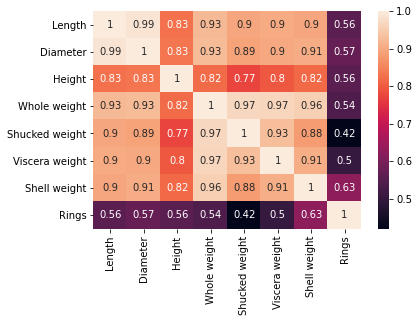

In [8]:
sns.heatmap(data=df.corr(),annot=True)

## e) Split data into train, test sets

In [9]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [10]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]) # Replace strings with an integer
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
df.replace({ "Sex":{"M": 0, "I": 1,"F":2 } },inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [13]:
df.Sex.value_counts()

0    1528
1    1342
2    1307
Name: Sex, dtype: int64

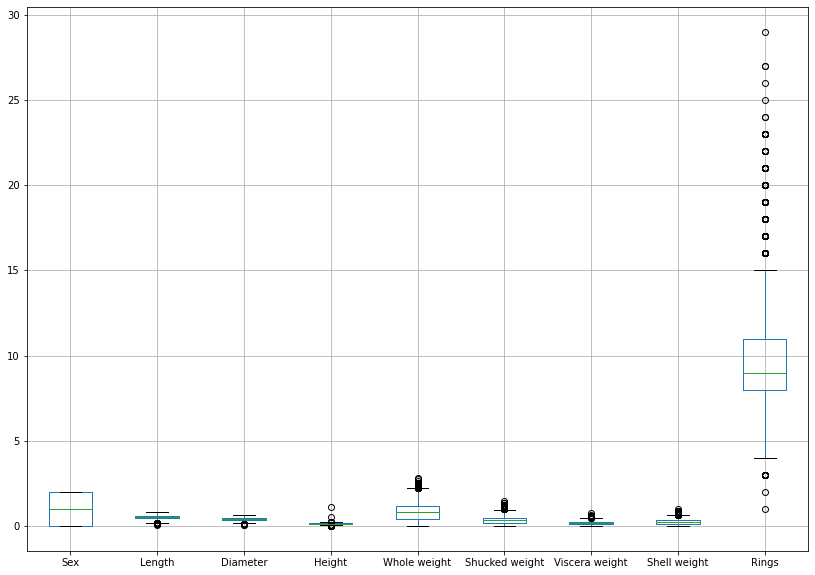

In [14]:
plt.figure(figsize=(14,10))
df.boxplot()

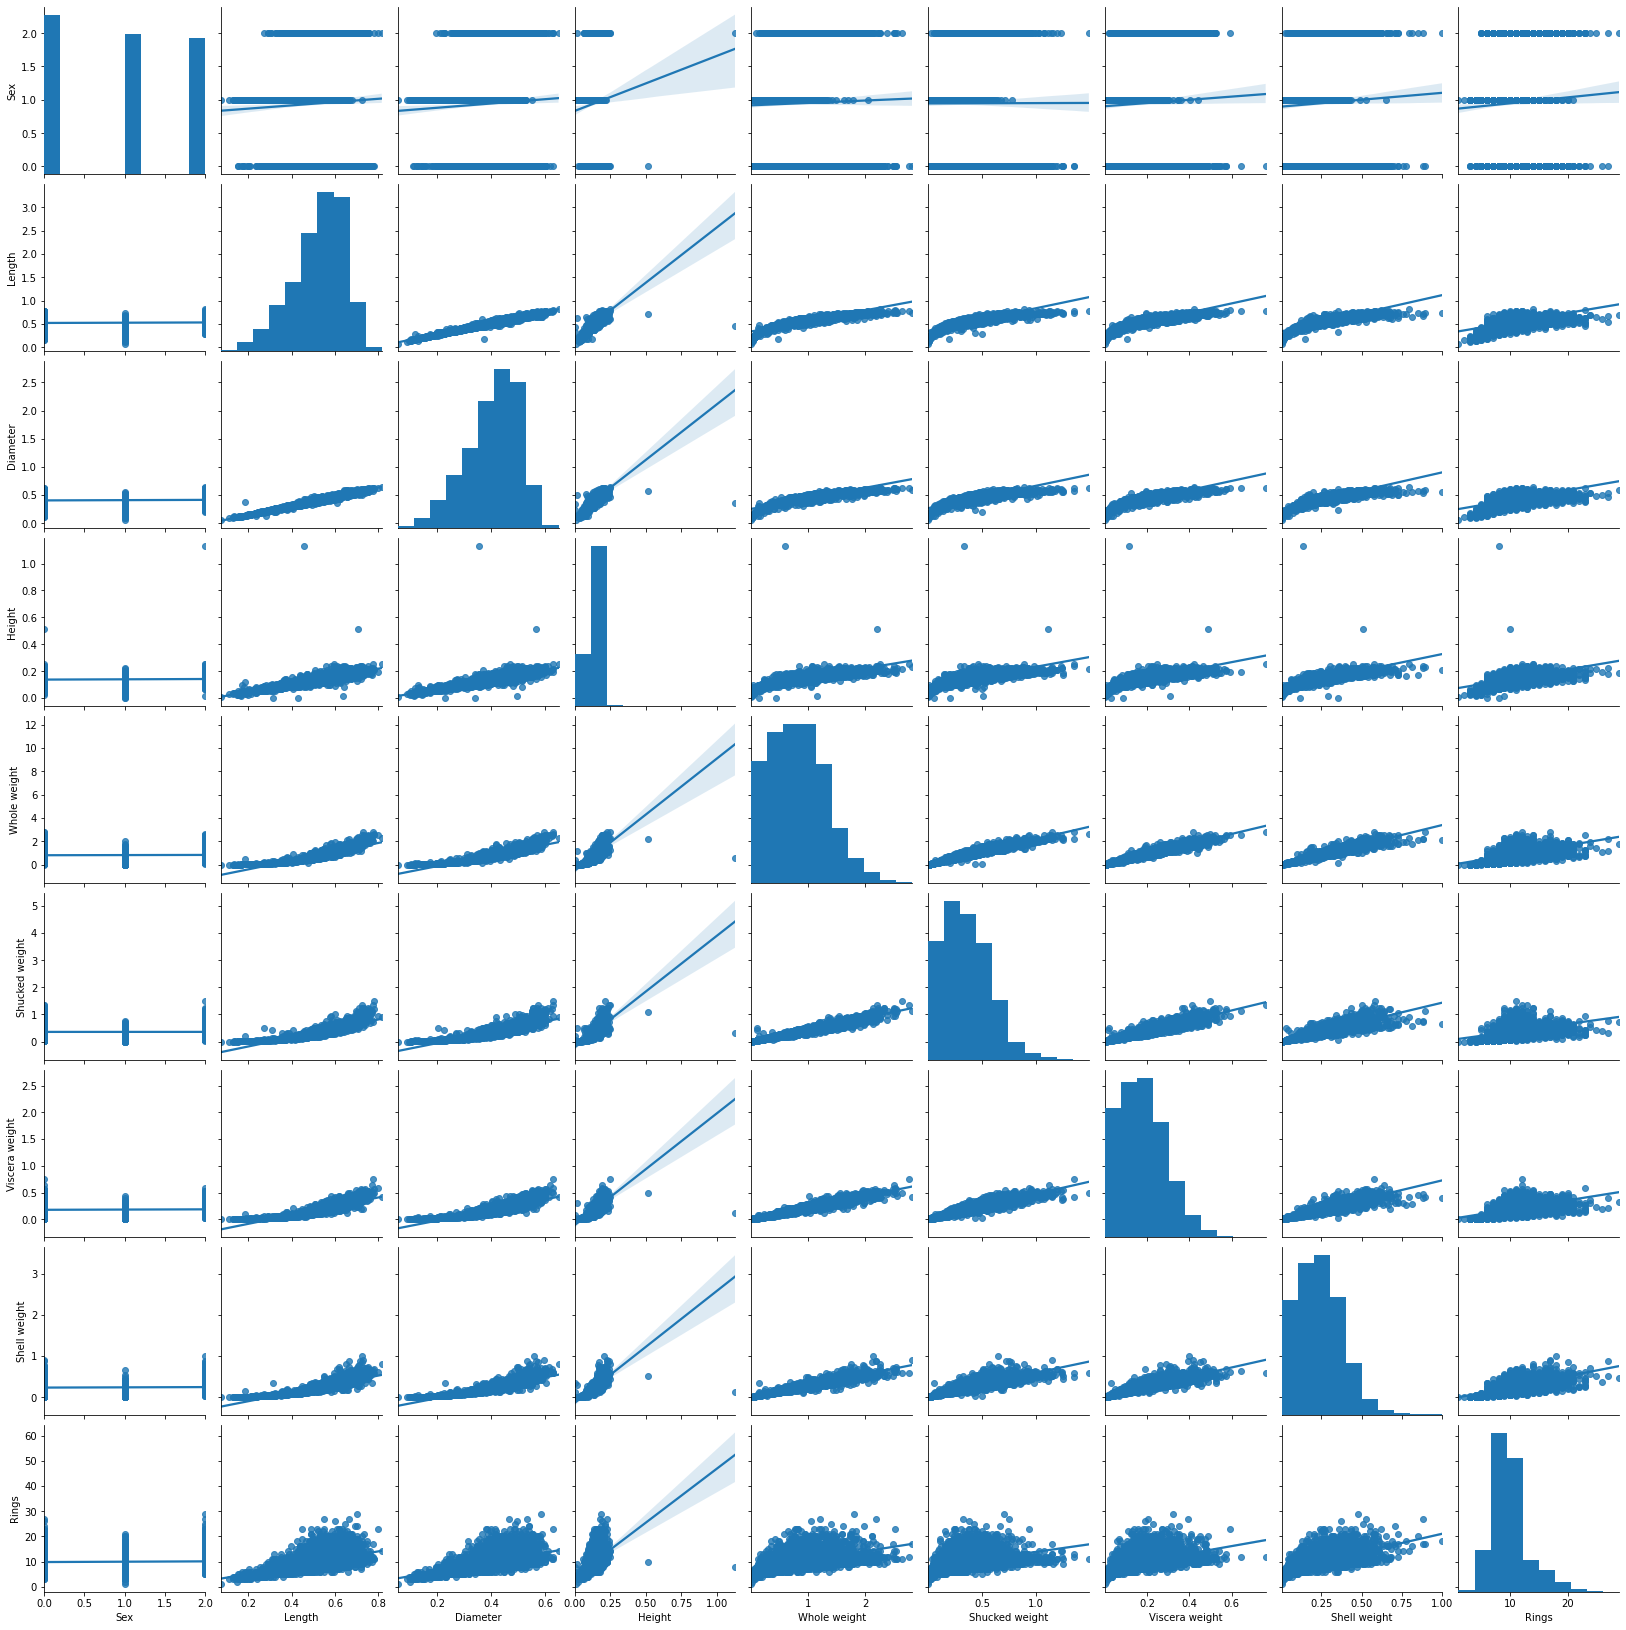

In [15]:
sns.pairplot(df,kind='reg')

### Predicting the age of abalone from physical measurements:the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Hence other measurements, which are easier to obtain, are used to predict the age. 

In [16]:
df['Age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [17]:
X = df.drop(columns=['Age'],axis=1) # first 8 columns are features
y = df['Age'] # target variable

In [18]:
print(X.shape)
print(y.shape)

(4177, 8)
(4177,)


In [19]:
from sklearn.model_selection import train_test_split # sklearn package's randomized data splitting function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)

(3132, 8)
(1045, 8)


In [21]:
print(y_train.shape)
print(y_test.shape)

(3132,)
(1045,)


## f) Predict the age of abalone from physical measurements using linear regression.

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

## g) Plot scatterplot of real data points and regression line.

In [24]:
def calculateRMSE(x,y,b0,b1,y_mean):
    rmse=0
    n=len(x)
    for i in range(n):
        y_pred=b0+b1*x[i]
        rmse+=(y[i]-y_pred)**2
    rmse=np.sqrt(rmse/n)

    #Accuracy of linear regression by R^2 score
    #R**2=SSR/SST
    sumofsquares=0  
    sumofresiduals=0
    for i in range(n):
        y_pred=b0+b1*x[i]
        sumofsquares+=(y[i]-y_mean)**2
        sumofresiduals+=(y[i]-y_pred)**2
    score=1-(sumofresiduals/sumofsquares)

    print("Accuracy score",score)

In [25]:
def calculate(x,y):

    n=len(x)
    x_mean=np.mean(x)
    y_mean=np.mean(y)

    numerator=0
    denominator=0
    numerator=np.sum((x-x_mean)*(y-y_mean))
    denominator = np.sum((x-x_mean)**2)

    b1=numerator/denominator
    b0=y_mean-b1*x_mean

    return b0,b1,x_mean,y_mean

predicted y 11.305089886723886 real y 16.5
predicted y 11.305089886723886 real y 8.5
predicted y 11.57664678417299 real y 10.5
predicted y 11.305089886723886 real y 11.5
predicted y 11.440868335448439 real y 8.5
predicted y 11.440868335448439 real y 9.5
predicted y 11.57664678417299 real y 21.5
predicted y 11.57664678417299 real y 17.5
predicted y 11.305089886723886 real y 10.5
predicted y 11.57664678417299 real y 20.5


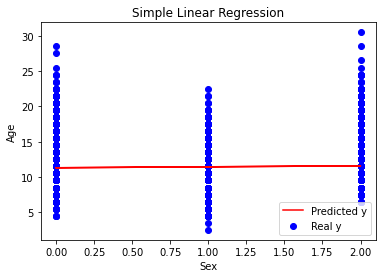

Accuracy score 0.0011990125248159123


In [26]:
def Linear_Regression():
    
    x=df["Sex"]
    y=df["Age"]
    b0,b1,x_mean,y_mean=calculate(x,y)

    ypred=b0+b1*x
    for i in range(0,10):
            print("predicted y",ypred[i],"real y",y[i])
    plt.plot(x, ypred, color='r', label= "Predicted y")
    plt.title("Simple Linear Regression")
    plt.scatter(x, y, color='b', label= "Real y") 
    plt.xlabel("Sex")
    plt.ylabel("Age")
    plt.legend()
    plt.show()

    calculateRMSE(x,y,b0,b1,y_mean)

Linear_Regression()

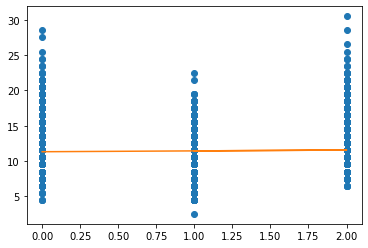

In [27]:
plt.plot(X_train['Sex'], y_train, 'o') # create scatter plot
m, b = np.polyfit(X_train['Sex'], y_train, 1) # m = slope, b=intercept
plt.plot(X_train['Sex'], m*X_train['Sex'] + b)

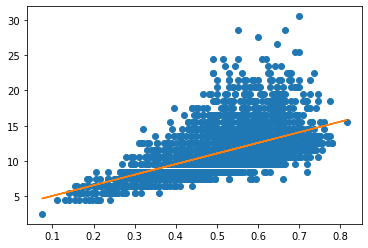

In [28]:
plt.plot(X_train['Length'], y_train, 'o') # create scatter plot
m, b = np.polyfit(X_train['Length'], y_train, 1) # m = slope, b=intercept
plt.plot(X_train['Length'], m*X_train['Length'] + b)

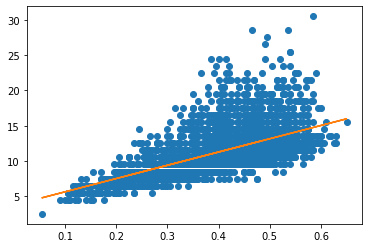

In [29]:
plt.plot(X_train['Diameter'], y_train, 'o') # create scatter plot
m, b = np.polyfit(X_train['Diameter'], y_train, 1) # m = slope, b=intercept
plt.plot(X_train['Diameter'], m*X_train['Diameter'] + b)

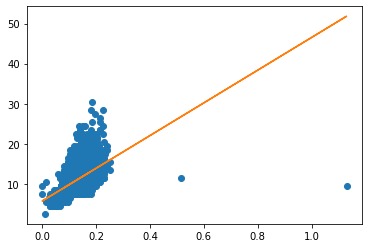

In [30]:
plt.plot(X_train['Height'], y_train, 'o') # create scatter plot
m, b = np.polyfit(X_train['Height'], y_train, 1) # m = slope, b=intercept
plt.plot(X_train['Height'], m*X_train['Height'] + b)

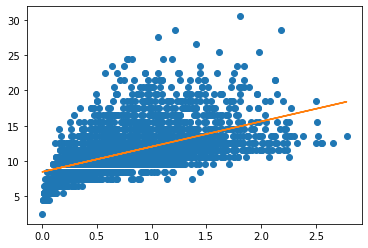

In [31]:
plt.plot(X_train['Whole weight'], y_train, 'o') # create scatter plot
m, b = np.polyfit(X_train['Whole weight'], y_train, 1) # m = slope, b=intercept
plt.plot(X_train['Whole weight'], m*X_train['Whole weight'] + b)

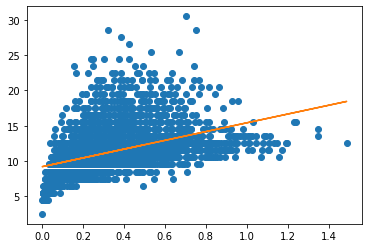

In [32]:
plt.plot(X_train['Shucked weight'], y_train, 'o') # create scatter plot
m, b = np.polyfit(X_train['Shucked weight'], y_train, 1) # m = slope, b=intercept
plt.plot(X_train['Shucked weight'], m*X_train['Shucked weight'] + b)

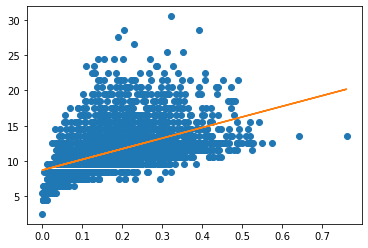

In [33]:
plt.plot(X_train['Viscera weight'], y_train, 'o') # create scatter plot
m, b = np.polyfit(X_train['Viscera weight'], y_train, 1) # m = slope, b=intercept
plt.plot(X_train['Viscera weight'], m*X_train['Viscera weight'] + b)

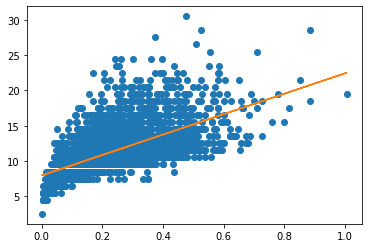

In [34]:
plt.plot(X_train['Shell weight'], y_train, 'o') # create scatter plot
m, b = np.polyfit(X_train['Shell weight'], y_train, 1) # m = slope, b=intercept
plt.plot(X_train['Shell weight'], m*X_train['Shell weight'] + b)

## h) Display the coefficients & intercept,accuracy score,Mean Squared Error (MSE) and RMSE.

In [35]:
lm.coef_

array([ -0.08471151,  -2.64060756,  15.13198156,  10.0319548 ,
         8.78566482, -19.95030902,  -8.19398913,   8.6154048 ])

In [36]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[idx]))

The coefficient for Sex is -0.08471151394877549
The coefficient for Length is -2.6406075619143743
The coefficient for Diameter is 15.131981557565528
The coefficient for Height is 10.0319548015865
The coefficient for Whole weight is 8.78566481838749
The coefficient for Shucked weight is -19.95030901996636
The coefficient for Viscera weight is -8.19398913433463
The coefficient for Shell weight is 8.615404803942093


In [37]:
lm.intercept_

4.595860454415104

In [38]:
lm.score(X_train, y_train)

0.5275038827505881

In [39]:
lm.score(X_test, y_test)

0.5265980089971987

In [40]:
from sklearn.metrics import mean_squared_error
t1 = mean_squared_error(y_train, train_pred)
print('Mean Squared error of training data :%2f'%t1)

t2 = mean_squared_error(y_test, test_pred)
print('Mean Squared error of testing data :%2f'%t2)

Mean Squared error of training data :4.928297
Mean Squared error of testing data :4.865857


In [41]:
rt1 = np.sqrt(mean_squared_error(y_train, train_pred))
print('Root Mean Squared error of training data :%2f'%rt1)

rt2 = np.sqrt(mean_squared_error(y_test, test_pred))
print('Root Mean Squared error of testing data :%2f'%rt2)

Root Mean Squared error of training data :2.219977
Root Mean Squared error of testing data :2.205869


In [42]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean